**Execute o script percepton.py e compare os resultados com os classificadores utilizados no laboratório passado.**

In [72]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

Carrega os dados e transforma em arrays 

In [61]:
print ("Loading data...")

X_train, y_train = load_svmlight_file('../shared_data/train.txt')
X_test, y_test = load_svmlight_file('../shared_data/test.txt')
size = X_train.shape

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

print("Data loaded: Train size={} \
          and Test size = {}".format(X_train.shape, X_test.shape))

Loading data...
Data loaded: Train size=(20000, 132) and Test size = (58646, 132)


In [152]:
print('Fitting... \n')
tic = time.time()

parameters = {
    'max_iter': range(5, 56, 1)
}

scores = []
# Executa um grid search para maximizar a acurácia através da busca dos parametros do classificador
perceptron = Perceptron()
clf = GridSearchCV(perceptron, parameters, return_train_score=True,
                   n_jobs=4, scoring='accuracy')

clf.fit(X_train_dense, y_train)

y_pred = clf.predict(X_test_dense)

# mostra o resultado do classificador na base de teste
print("Best model params: {}, accuracy score: {} \n".format(
        clf.best_params_, accuracy_score(y_test, y_pred)))

# cria a matriz de confusao
cm = confusion_matrix(y_test, y_pred)
print(cm)

toc = time.time()
print("\n --- %s seconds ---" % ( toc - tic))

Fitting... 

Best model params: {'max_iter': 47}, accuracy score: 0.9485727926883334 

[[5137    1    7    9   22    3   22   19  338    2]
 [   1 6236   35   58   57  101   12  112   33   10]
 [   3   51 5618   26    6    0    8  123   51    2]
 [   1   12   40 5442    8  100    0  151   21   44]
 [   7    2   22    0 5517    1   38   12   15  108]
 [   4    9    3   51    6 5363   20    3   28   52]
 [  52   14    9    0   63   58 5602    0   60    0]
 [   0   16   53   13   66    1    0 5924    4   20]
 [  13   13   15   29   65   88   24   25 5311  112]
 [  17    5    7   33  163    7    1   53   47 5480]]

 --- 112.89231705665588 seconds ---


**1. Quantas iterações são necessárias para que o perceptron encontre a melhor acurácia?**

O modelo Perceptron encontrou a melhor acurácia com 47 iterações, sendo que o resultado na base de testes foi de 0.9485 de acurácia. 

____

**Qual é o tamanho da base de treinamento para que perceptron alcançe a melhor acurácia?**


In [153]:
# criar os batchs da base 
batchs = list(range(100, 1001, 100)) + list(range(1000, size[0] + 1, 1000))
print(batchs)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]


In [156]:
scores = []
for edge in batchs:
    #treina o estimador com os melhores parametros encontrados acima
    perceptron = Perceptron(**clf.best_params_)
    perceptron.fit(X_train_dense[:edge], y_train[:edge])
    scores.append(perceptron.score(X_test_dense, y_test))


Tamanho da base de treinamento que resultou na melhor acurácia: 18000


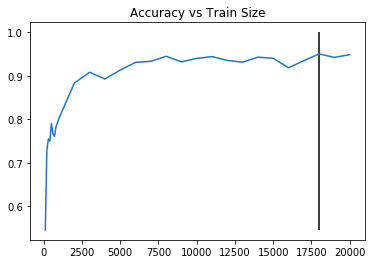

In [195]:
plt.title("Accuracy vs Train Size")
plt.plot(batchs, scores)
plt.vlines(batchs[scores.index(max(scores))], min(scores), 1.0)

print("Tamanho da base de treinamento que resultou na melhor acurácia:", 
          batchs[scores.index(max(scores))])

Podemos notar que com a base a partir do tamanho 7000 não observamos diferença significativa no valor da acurácia, isso se comprova pelo desvio padrão dos resultados deste intervalo que é de 0.008 como vemos abaixo. Sendo assim, por se tratar de um problema que não é sensível é preferivel utilizar base de menor tamanho para priorizar a performance do modelo. 

In [186]:
np.std(scores[batchs.index(7000):])

0.008025571020236722

---